In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [2]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [3]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_NEM.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

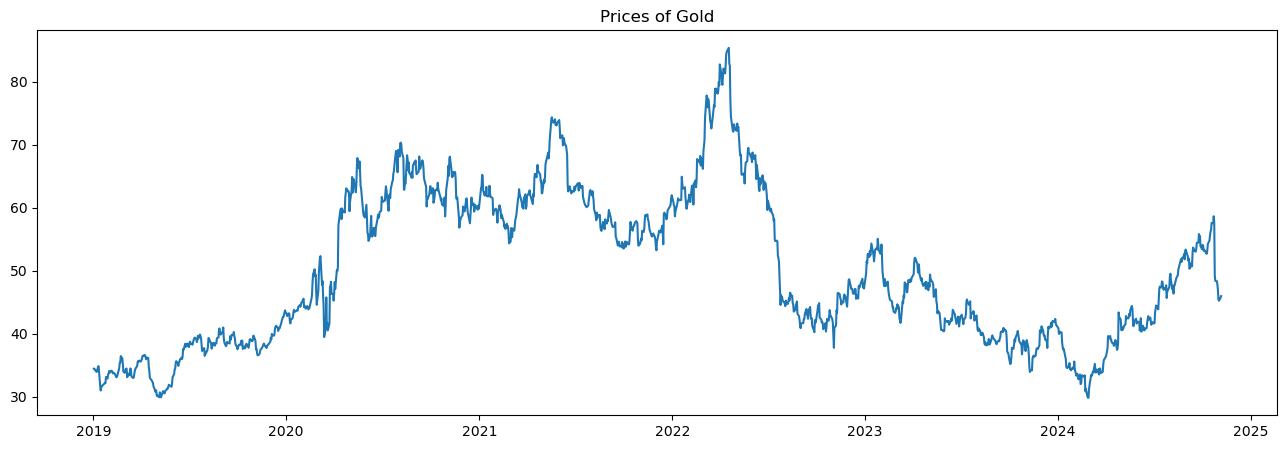

In [4]:
# Format column Date
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis=1, inplace=True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16, 5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [5]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [6]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [7]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [8]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50, return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.14725, saving model to save_model_7_2_1.keras
19/19 - 4s - 225ms/step - loss: 0.1472
Epoch 2/80

Epoch 2: loss improved from 0.14725 to 0.06051, saving model to save_model_7_2_1.keras
19/19 - 1s - 54ms/step - loss: 0.0605
Epoch 3/80

Epoch 3: loss improved from 0.06051 to 0.04880, saving model to save_model_7_2_1.keras
19/19 - 1s - 62ms/step - loss: 0.0488
Epoch 4/80

Epoch 4: loss improved from 0.04880 to 0.04604, saving model to save_model_7_2_1.keras
19/19 - 1s - 56ms/step - loss: 0.0460
Epoch 5/80

Epoch 5: loss improved from 0.04604 to 0.04219, saving model to save_model_7_2_1.keras
19/19 - 1s - 55ms/step - loss: 0.0422
Epoch 6/80

Epoch 6: loss improved from 0.04219 to 0.04018, saving model to save_model_7_2_1.keras
19/19 - 1s - 57ms/step - loss: 0.0402
Epoch 7/80

Epoch 7: loss did not improve from 0.04018
19/19 - 1s - 52ms/step - loss: 0.0409
Epoch 8/80

Epoch 8: loss improved from 0.04018 to 0.03757, saving model to save_model_7_2_1.keras


In [9]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [10]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [11]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [12]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.1972642109669669, 0.19888408432824267, 0.21472283718365226, 0.23308137740674162, 0.22318211401303745, 0.2293016274207339, 0.21670268986239316, 0.20860332359597034, 0.21562275137004172, 0.21616268623896606, 0.21220304963598702, 0.21328291919385034, 0.24460044540721904, 0.2636788760506922, 0.2568394724025974, 0.25251978754766524, 0.2807775225899417, 0.3115550453598688, 0.31767455876756523, 0.3147947917224495, 0.3322534177591494, 0.33135350357276006, 0.31767455876756523, 0.3084953229432792, 0.3137149221645862, 0.309755216627119, 0.32109432925612247, 0.28509720744487377, 0.30363570321942257, 0.3135348980386097, 0.31587473021480095, 0.3457523384383677, 0.3543916395737149, 0.3356731196731896, 0.30903525781220353, 0.31929443194885565, 0.2976962139377026, 0.32127428462759644, 0.32127428462759644, 0.3407127635230227, 0.34485242425197826, 0.34701223230219314, 0.3500720232932999, 0.3662706868916573, 0.38390926847981666, 0.38858893265221384, 0.39614829529520956, 0.38786897383729835, 0.

In [13]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.2899417281150818], [0.28946906328201294], [0.2875688076019287], [0.2848098576068878], [0.28169143199920654], [0.27863752841949463], [0.27593791484832764], [0.2737353444099426], [0.27204829454421997], [0.2708096206188202], [0.2699069678783417], [0.2692159414291382], [0.26862356066703796], [0.2680405080318451], [0.26740577816963196], [0.26668456196784973], [0.2658635079860687], [0.2649436891078949], [0.2639349102973938], [0.26284998655319214], [0.2617015838623047], [0.26050037145614624], [0.2592545747756958], [0.25796958804130554], [0.25664961338043213], [0.2552975118160248], [0.2539162337779999], [0.25250881910324097], [0.25107893347740173], [0.24963071942329407]]


In [18]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

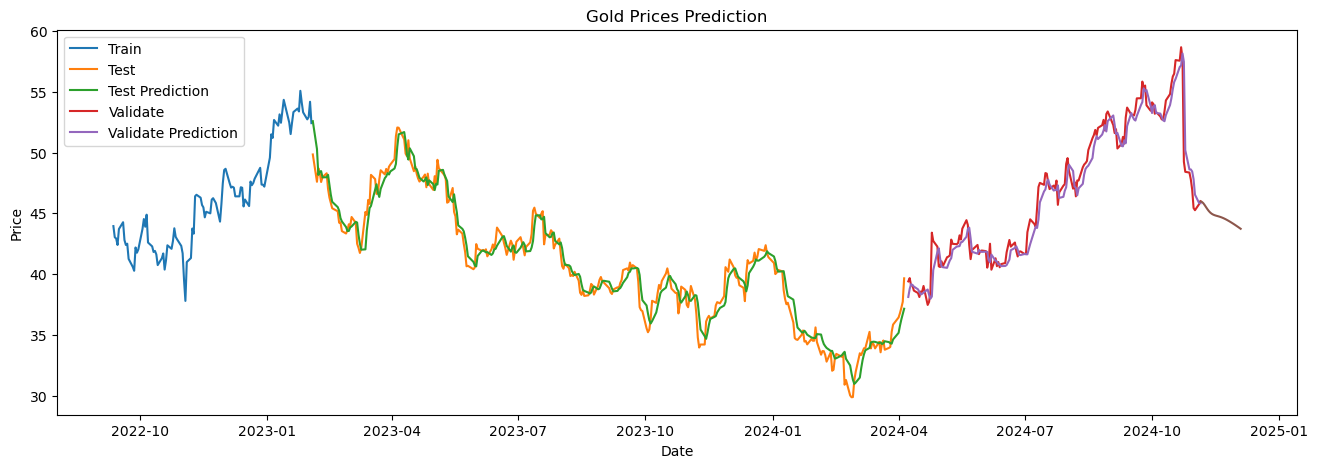

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'Close' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [42]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.7445987001466836
MAPE:  1.8700585742106646
RMSE:  0.9720134894219113

** Validate **
MAE:  0.7622513127785842
MAPE:  1.630330315629868
RMSE:  1.1882174035341537


# Split dataset (6-3-1)

---



In [57]:
#Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [58]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [59]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [60]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.17940, saving model to save_model_6_3_1.keras
16/16 - 4s - 247ms/step - loss: 0.1794
Epoch 2/80

Epoch 2: loss improved from 0.17940 to 0.07442, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0744
Epoch 3/80

Epoch 3: loss improved from 0.07442 to 0.05327, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0533
Epoch 4/80

Epoch 4: loss improved from 0.05327 to 0.04780, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0478
Epoch 5/80

Epoch 5: loss improved from 0.04780 to 0.04628, saving model to save_model_6_3_1.keras
16/16 - 1s - 62ms/step - loss: 0.0463
Epoch 6/80

Epoch 6: loss improved from 0.04628 to 0.04402, saving model to save_model_6_3_1.keras
16/16 - 1s - 75ms/step - loss: 0.0440
Epoch 7/80

Epoch 7: loss improved from 0.04402 to 0.04181, saving model to save_model_6_3_1.keras
16/16 - 1s - 79ms/step - loss: 0.0418
Epoch 8/80

Epoch 8: loss improved from 0.04181 to 0.04

In [61]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [62]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [63]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [64]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.1972642109669669, 0.19888408432824267, 0.21472283718365226, 0.23308137740674162, 0.22318211401303745, 0.2293016274207339, 0.21670268986239316, 0.20860332359597034, 0.21562275137004172, 0.21616268623896606, 0.21220304963598702, 0.21328291919385034, 0.24460044540721904, 0.2636788760506922, 0.2568394724025974, 0.25251978754766524, 0.2807775225899417, 0.3115550453598688, 0.31767455876756523, 0.3147947917224495, 0.3322534177591494, 0.33135350357276006, 0.31767455876756523, 0.3084953229432792, 0.3137149221645862, 0.309755216627119, 0.32109432925612247, 0.28509720744487377, 0.30363570321942257, 0.3135348980386097, 0.31587473021480095, 0.3457523384383677, 0.3543916395737149, 0.3356731196731896, 0.30903525781220353, 0.31929443194885565, 0.2976962139377026, 0.32127428462759644, 0.32127428462759644, 0.3407127635230227, 0.34485242425197826, 0.34701223230219314, 0.3500720232932999, 0.3662706868916573, 0.38390926847981666, 0.38858893265221384, 0.39614829529520956, 0.38786897383729835, 0.

In [65]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.2855786383152008], [0.28464433550834656], [0.2824781537055969], [0.2799837291240692], [0.2774660289287567], [0.27507057785987854], [0.2728422284126282], [0.27076178789138794], [0.2687818109989166], [0.2668536603450775], [0.2649422883987427], [0.26303091645240784], [0.26111820340156555], [0.25921303033828735], [0.2573281526565552], [0.25547564029693604], [0.25366437435150146], [0.2518986761569977], [0.25017884373664856], [0.24850234389305115], [0.24686504900455475], [0.24526230990886688], [0.24368976056575775], [0.24214386940002441], [0.24062223732471466], [0.2391231656074524], [0.23764601349830627], [0.23619075119495392], [0.2347576767206192], [0.23334749042987823]]


In [66]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[45.72674906]
 [45.6748392 ]
 [45.55448614]
 [45.41589592]
 [45.2760125 ]
 [45.14292124]
 [45.01911415]
 [44.90352488]
 [44.79351737]
 [44.68638933]
 [44.58019351]
 [44.47399769]
 [44.36772735]
 [44.26187594]
 [44.15715214]
 [44.05422656]
 [43.95359263]
 [43.85549044]
 [43.75993656]
 [43.66679023]
 [43.57582213]
 [43.48677395]
 [43.39940311]
 [43.3135134 ]
 [43.22897153]
 [43.14568311]
 [43.06361254]
 [42.98275817]
 [42.90313656]
 [42.82478661]]


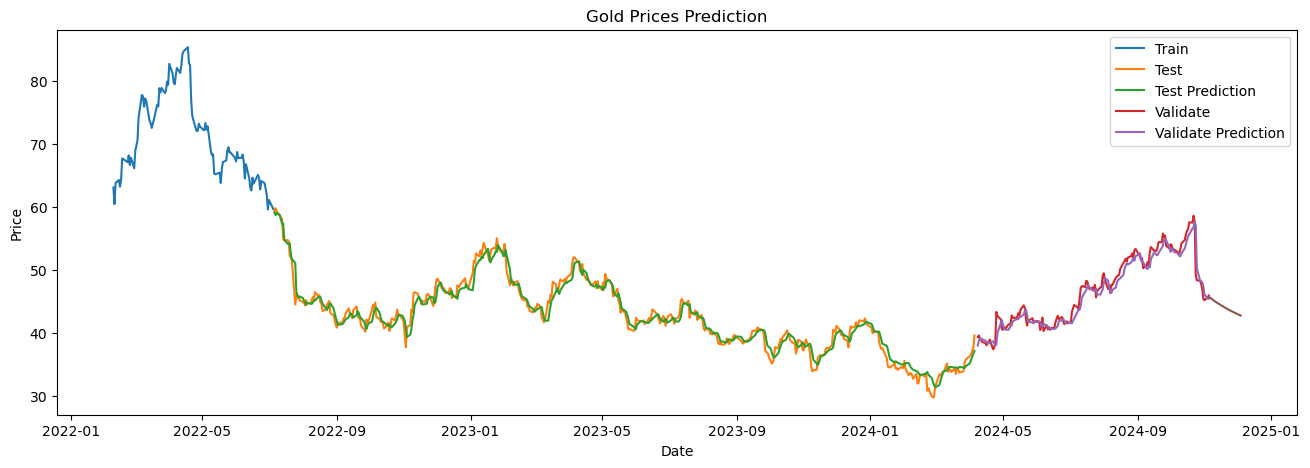

In [67]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [68]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.8663311609575295
MAPE:  2.0830808976927817
RMSE:  1.1468310784708122

** Validate **
MAE:  0.9163985639201726
MAPE:  1.9389984423070459
RMSE:  1.3002402907430364


# Split dataset (5-3-2)

---



In [41]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [42]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [43]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [44]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.16318, saving model to save_model_5_3_2.keras
13/13 - 4s - 294ms/step - loss: 0.1632
Epoch 2/80

Epoch 2: loss improved from 0.16318 to 0.05977, saving model to save_model_5_3_2.keras
13/13 - 1s - 55ms/step - loss: 0.0598
Epoch 3/80

Epoch 3: loss improved from 0.05977 to 0.04879, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0488
Epoch 4/80

Epoch 4: loss improved from 0.04879 to 0.04591, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0459
Epoch 5/80

Epoch 5: loss improved from 0.04591 to 0.04297, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0430
Epoch 6/80

Epoch 6: loss improved from 0.04297 to 0.04124, saving model to save_model_5_3_2.keras
13/13 - 1s - 56ms/step - loss: 0.0412
Epoch 7/80

Epoch 7: loss did not improve from 0.04124
13/13 - 1s - 50ms/step - loss: 0.0414
Epoch 8/80

Epoch 8: loss improved from 0.04124 to 0.03766, saving model to save_model_5_3_2.keras


In [48]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [49]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [50]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [51]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.1972642109669669, 0.19888408432824267, 0.21472283718365226, 0.23308137740674162, 0.22318211401303745, 0.2293016274207339, 0.21670268986239316, 0.20860332359597034, 0.21562275137004172, 0.21616268623896606, 0.21220304963598702, 0.21328291919385034, 0.24460044540721904, 0.2636788760506922, 0.2568394724025974, 0.25251978754766524, 0.2807775225899417, 0.3115550453598688, 0.31767455876756523, 0.3147947917224495, 0.3322534177591494, 0.33135350357276006, 0.31767455876756523, 0.3084953229432792, 0.3137149221645862, 0.309755216627119, 0.32109432925612247, 0.28509720744487377, 0.30363570321942257, 0.3135348980386097, 0.31587473021480095, 0.3457523384383677, 0.3543916395737149, 0.3356731196731896, 0.30903525781220353, 0.31929443194885565, 0.2976962139377026, 0.32127428462759644, 0.32127428462759644, 0.3407127635230227, 0.34485242425197826, 0.34701223230219314, 0.3500720232932999, 0.3662706868916573, 0.38390926847981666, 0.38858893265221384, 0.39614829529520956, 0.38786897383729835, 0.

In [52]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.2997286021709442], [0.30590975284576416], [0.3116353154182434], [0.3166714310646057], [0.3213217854499817], [0.32590827345848083], [0.3306728005409241], [0.3357554078102112], [0.34120357036590576], [0.3469996154308319], [0.3530910015106201], [0.3594147264957428], [0.36591288447380066], [0.3725399672985077], [0.37926390767097473], [0.3860640227794647], [0.39292728900909424], [0.3998454511165619], [0.4068121016025543], [0.41382208466529846], [0.4208710193634033], [0.4279550313949585], [0.43507134914398193], [0.44221895933151245], [0.44939717650413513], [0.45660683512687683], [0.4638495445251465], [0.47112709283828735], [0.4784415364265442], [0.4857945442199707]]


In [53]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[46.51292102]
 [46.85634573]
 [47.17445797]
 [47.45426455]
 [47.71263823]
 [47.96746349]
 [48.2321806 ]
 [48.51457025]
 [48.81727015]
 [49.1392984 ]
 [49.47773579]
 [49.82908194]
 [50.19011958]
 [50.55832028]
 [50.93190239]
 [51.30971677]
 [51.69103983]
 [52.0754129 ]
 [52.46247998]
 [52.85195462]
 [53.24359342]
 [53.63718111]
 [54.03256371]
 [54.42968491]
 [54.82850664]
 [55.22907526]
 [55.63148017]
 [56.03582074]
 [56.44221121]
 [56.8507443 ]]


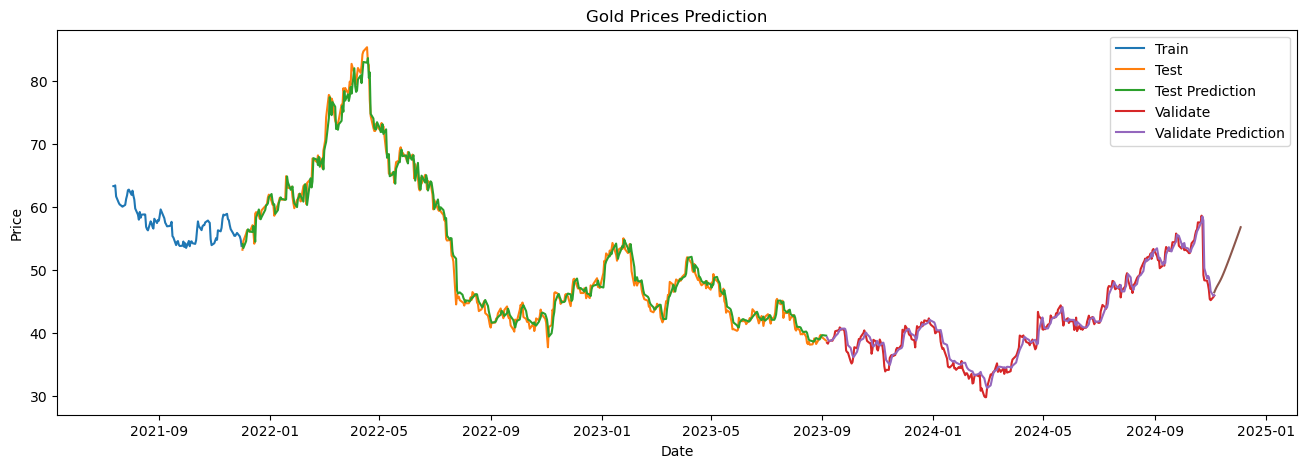

In [55]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Close[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [56]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.9774640835416666
MAPE:  1.8610993275450811
RMSE:  1.3211106598685085

** Validate **
MAE:  0.8488351855595205
MAPE:  2.115770736052229
RMSE:  1.1963514363950505


# Evaluating model

---

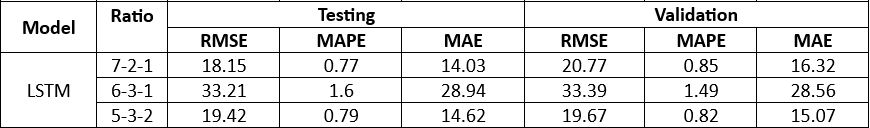